# Домашнее задание №1: линейная регрессия (10 баллов).

Некоторые задания будут по вариантам (всего 4 варианта). Чтобы выяснить свой вариант, посчитайте количество букв в своей фамилии, возьмете остаток от деления на 4 и прибавьте 1.

#### Напишите сюда свой вариант: 1

In [16]:
import numpy as np

## Многомерная линейная регрессия из sklearn

Применим многомерную регрессию из sklearn для стандартного датасета

In [18]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

(10000, 100) (10000,)


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [1266]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))

1.8708910862922383e-25


Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [1345]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.0000001308, learning_rate='constant', eta0=0.00012, shuffle=False, max_iter=1000).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

1.8709549926785575e-08


array([ 4.35733801e+01,  4.71850999e-06,  1.79519164e-05,  3.46516816e-06,
       -9.67371730e-06, -1.94384578e-07,  1.03797412e-05, -1.38510357e-05,
        6.81115091e+01, -3.50722996e-06,  6.16325203e-06,  7.59095112e-06,
       -1.25271291e-05, -2.20436919e-05, -2.15206468e-05,  3.50092934e+01,
       -1.06033967e-07,  1.32872313e-06,  1.83116366e-05,  1.59828860e-05,
       -2.83988741e-06, -1.11637091e-06, -5.00840168e-06,  8.40088885e+01,
        6.56961252e-06, -2.65682718e-05, -1.38401736e-05,  1.25903691e-05,
        6.25168205e-06, -6.70688303e-06,  2.26622141e-06,  1.49845351e-05,
        6.40930256e-06, -2.67124897e-06, -2.35030878e-05,  7.52516606e-06,
       -9.24154291e-07, -1.46483859e-05,  3.52526838e+01,  1.37959572e-05,
       -3.53280861e-06, -1.09714299e-05, -1.31465052e-05, -2.25284369e-05,
       -1.42825146e-06, -1.69457144e-05, -7.14947377e-06, -1.30156091e-05,
        8.64014863e+01,  3.58676713e+01,  7.06318088e-06, -6.14986695e-06,
       -7.77759544e-06, -

***Задание 1 (1 балл).*** Объясните, чем вызвана разница в значениях двух полученных значений метрики?

***Задание 2 (1 балл).*** Подберите гиперпараметры в методе градиентного спуска так, чтобы значение MSE было близко к значению MSE, полученному при обучении LinearRegression.

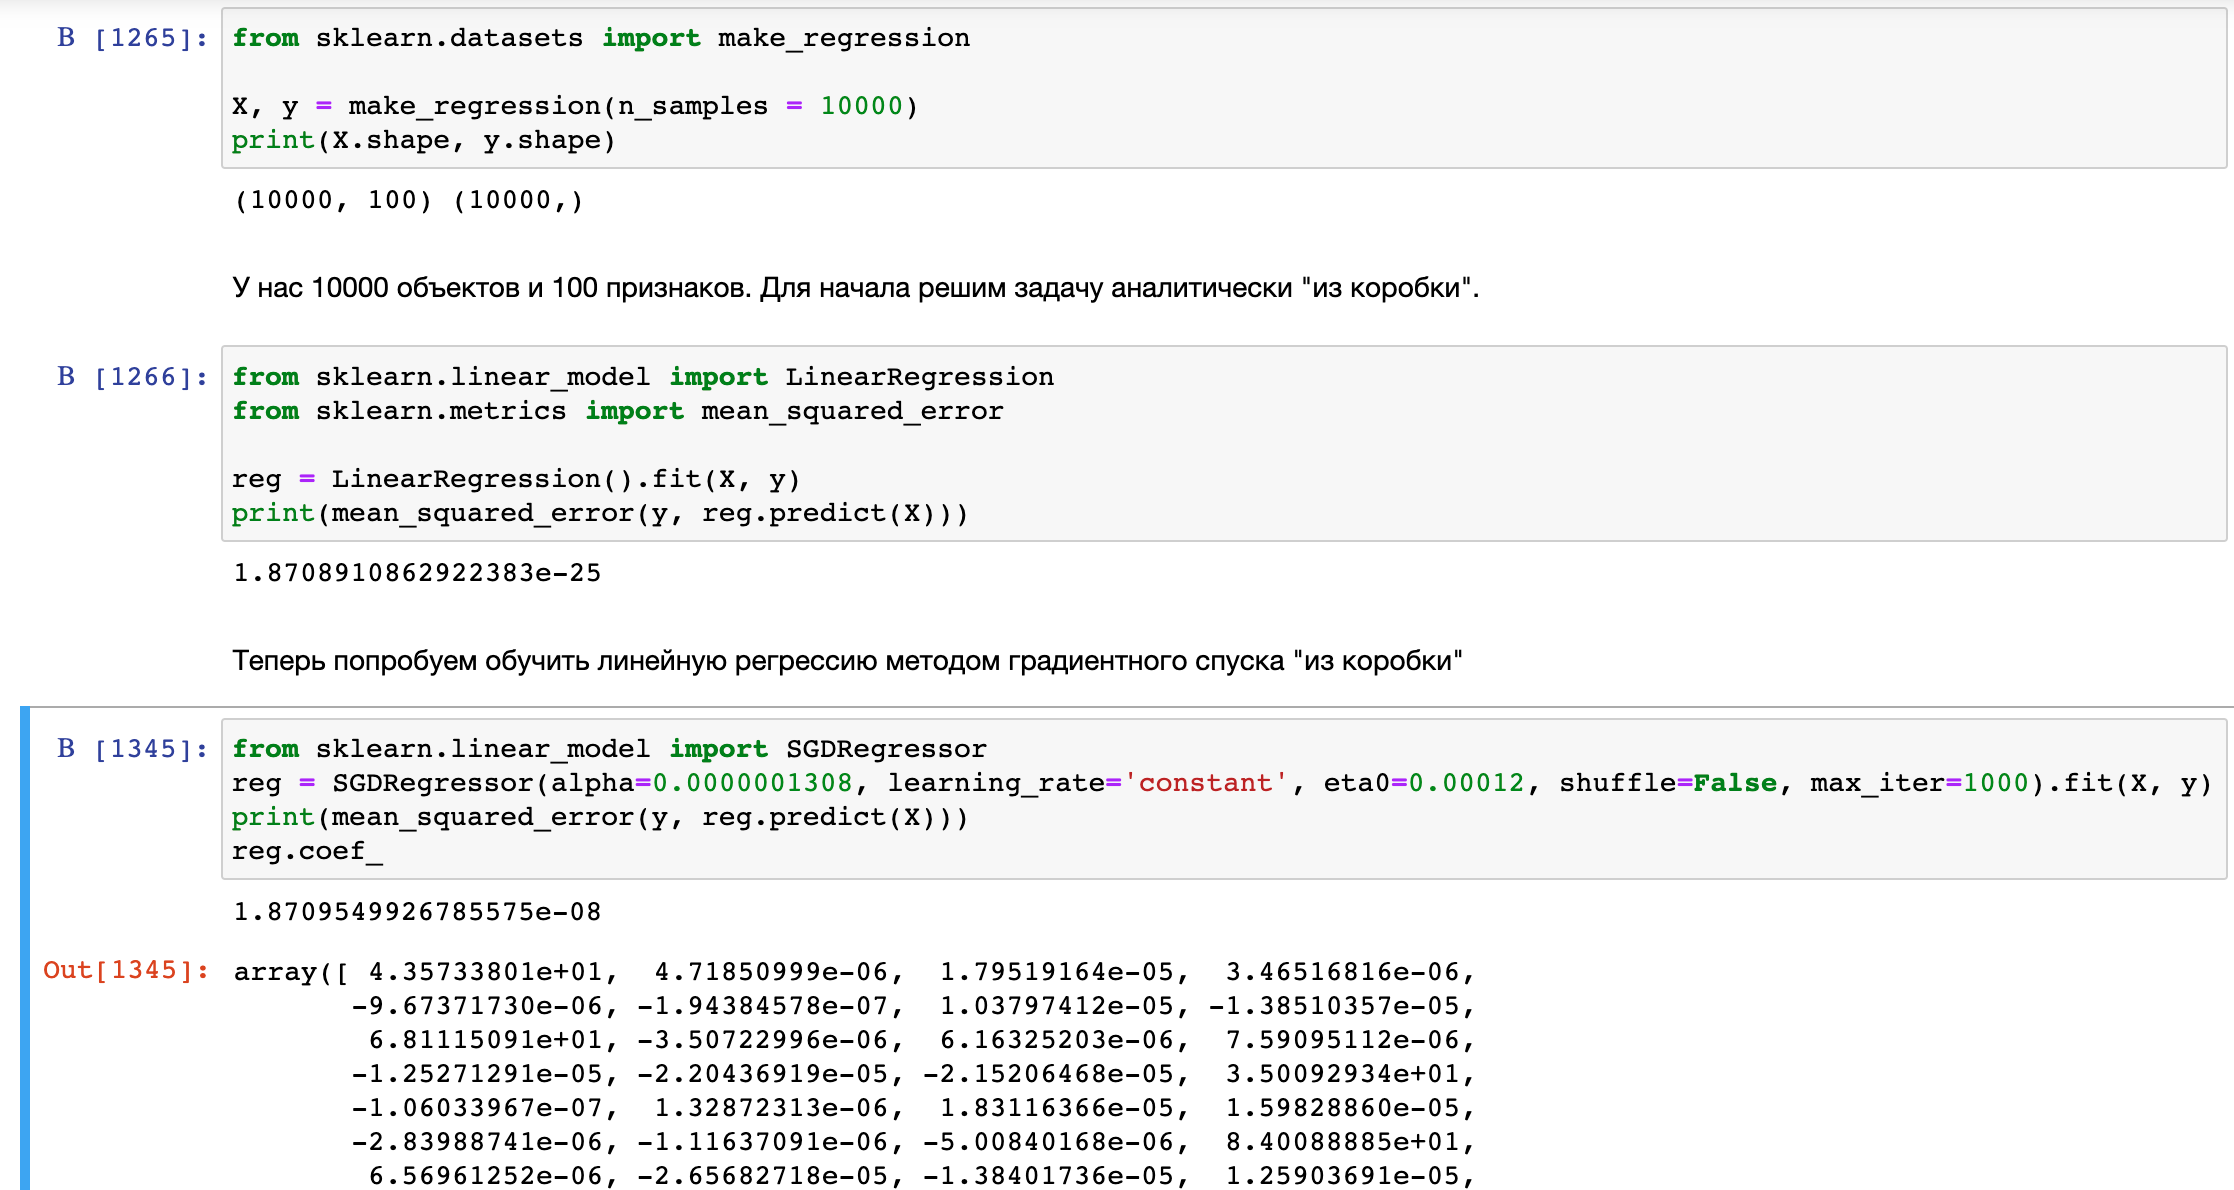

## Ваша многомерная линейная регрессия

***Задание 3 (5 баллов)***. Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом *градиентного спуска*. Для этого используйте шаблонный класс. 

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

***Задание 4 (2 балла)***. Добавьте l1 (первый и четвертый варианты) или l2 (второй и третий варианты) регуляризацию. 

In [26]:
class LinearRegression(object):
    def __init__(self, alpha=0.00001, l_ratio=0.001, tol=0.001, max_iter=1000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        l_ratio - параметр регуляризации
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        
        # your code here
        self.alpha = alpha  # инициализируем параметры
        self.l_ratio = l_ratio
        self.tol = tol
        self.max_iter = max_iter
             
    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''
        B_x = np.zeros(X.shape[1]) # создаем вектор весов при иксах, состоящий пока из нулей
        B_0 = 0 # задаём intercept  
        
        for i in range(self.max_iter): # по сути является критерием остановки, если совершено слишком много итерацийй
            y_pred = np.sum(B_x * X, axis=1) + B_0 # подсчитывается вектор предсказанных y
            B_x_gradient = -2 * X.T @ (y - y_pred) + self.l_ratio * np.sign(B_x) # записываем формулу градиента для весов B_x с регуляризацией. Это попросту матрица частных производных по весам при регрессорах. А np.sign используется, чтобы обозначить знак при каждом весе, так как он понадобится в части производной, которая представляет из себя регуляризацию.
            B_0_gradient = -2 * (y - y_pred) # по интерсепту регуляризацию не обязательно делать, как я прочитал в интернете), поэтому просто записываем производную по нему от функции потерь
            B_x_crit = B_x # запомним критические значения для критерия остановки 
            B_0_crit = B_0# запомним критические значения для критерия остановки
            B_x = B_x - self.alpha * B_x_gradient # новые веса после одной итерации спуска
            B_0 = B_0 - self.alpha * B_0_gradient # новые веса после одной итерации спуска
            if np.all(abs(B_x - B_x_crit) < self.tol) and np.all(abs(B_0 - B_0_crit)) < self.tol:  # учтём критерии остановки. Изменение всех весов должно быть меньше tol, чтобы алгоритм прервался
                break
        y_pred = np.sum(B_x * X, axis=1) + B_0 # подсчитывается вектор предсказанных y 
        self.B_x = B_x
        self.B_0 = B_0[0] # запоминаем B_0 как число, потому что в любом случае весь вектор B_0 состоит из одинаковых чисел, а при сложении вектора с числом число прибавляется ко всем элементам вектора, а мне так возможно будет использовать train и test, чтобы протестировать модельку на переобученность в методе predict
        return y_pred # выводится вектор предсказанных y 
   
    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''
        
        # your code here
        y_predict_final = np.sum(X * self.B_x, axis=1) + self.B_0 # предиктим значения y по полученным ранее весам 
    
        return y_predict_final

In [27]:
from sklearn.metrics import mean_squared_error
my_reg = LinearRegression()
my_reg.fit(X, y)
assert mean_squared_error(y, my_reg.predict(X)) < 1e-3
print('You are amazing! Great work!')

You are amazing! Great work!


In [28]:
mean_squared_error(y, my_reg.predict(X))

0.0008850937408418176

In [52]:
# решил проверить переобученность модели, разделив данные на тренировочную и тестовую выборки
X_train = X[:8000, :]  # Первые 8000 строк
X_test = X[8000:, :]   # Последние 2000 строк
y_train = y[:8000]
y_test = y[8000:]
print(X_train.shape)
my_reg1 = LinearRegression()
my_reg1.fit(X_train, y_train)
print(f'Train MSE: {mean_squared_error(y_test, my_reg1.predict(X_test))}\nTest MSE: {mean_squared_error(y_train, my_reg1.predict(X_train))}')

(8000, 100)
Train MSE: 0.0013980003622154145
Test MSE: 0.001361026102287684


***Задание 5 (1 балл)***. Обучите линейную регрессию из коробки с l1-регуляризацией (from sklearn.linear_model import Lasso, первый и четвертый варианты) или с l2-регуляризацией (from sklearn.linear_model import Ridge, второй и третий варианты) с значением параметра регуляризации 0.1. Обучите вашу линейную регрессию с тем же значением параметра регуляризации и сравните результаты. Сделайте выводы.

In [53]:
#your code here
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))

0.10093058063095182

In [54]:
from sklearn.metrics import mean_squared_error
my_reg_l_ratio_01 = LinearRegression(l_ratio=0.1)
my_reg_l_ratio_01.fit(X, y)
print(mean_squared_error(y, my_reg_l_ratio_01.predict(X)))

0.0008854668180716062
